## Implementing a Deep Convolutional Autoencoder


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=1000)
X_train = faces['images']

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\lenovo\scikit_learn_data


In [2]:
width, height = 32, 32
X_train = tf.image.resize(X_train[..., np.newaxis], (width, height))

In [3]:
nb_epochs = 100
batch_size = 50
code_length = 256

Step 4: Adding Noise to Images

To make the autoencoder more robust we add Gaussian noise to the images. This will be the input to the autoencoder during training.

- tf.random.normal(): Creates random noise.
- noise_factor=0.2: Controls how much noise is added.
- tf.clip_by_value(): Keeps pixel values between 0 and 1 (valid grayscale range).

In [4]:
def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * tf.random.normal(shape=images.shape)
    return tf.clip_by_value(noisy_images, 0.0, 1.0)

In [5]:
def build_autoencoder(input_shape, code_length=256):
    input_img = keras.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_img)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    code_layer = layers.Dense(code_length, activation='sigmoid')(x)

    x = layers.Dense((width // 2) * (height // 2) * 128, activation='relu')(code_layer)
    x = layers.Reshape((width // 2, height // 2, 128))(x)
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    output_img = layers.Conv2DTranspose(1, (3, 3), strides=(1, 1), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, output_img)
    return autoencoder

In [6]:
input_shape = (width, height, 1)
autoencoder = build_autoencoder(input_shape)

autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [7]:
X_train_noisy = add_noise(X_train)
autoencoder.fit(X_train_noisy, X_train, epochs=nb_epochs, batch_size=batch_size, shuffle=True)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - loss: 0.0248
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - loss: 0.0210
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - loss: 0.0199
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - loss: 0.0188
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - loss: 0.0183
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - loss: 0.0178
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - loss: 0.0175
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - loss: 0.0173
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 462ms/step - loss: 0.0171
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 550ms/step - loss: 0.0162
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 824ms/step - loss: 0.0153
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - loss: 0.0148
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - loss: 0.0145
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - loss: 0.0132
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - loss: 0.0121
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


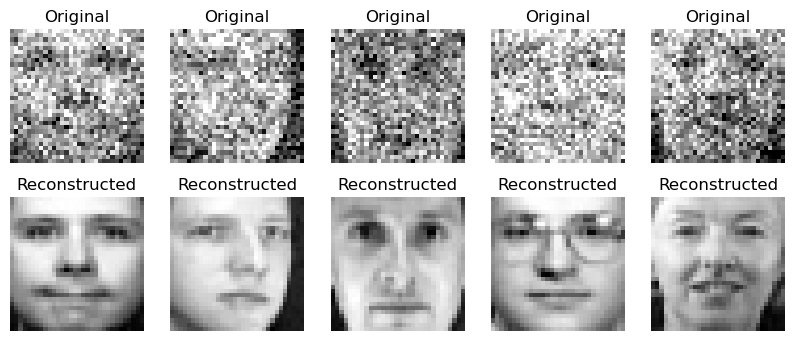

In [8]:
def show_images(original, reconstructed, num=5):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(2, num, i + 1)
        plt.imshow(original[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title("Original")

        plt.subplot(2, num, num + i + 1)
        plt.imshow(reconstructed[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title("Reconstructed")

    plt.show()

X_train_noisy = X_train_noisy.numpy() if isinstance(X_train_noisy, tf.Tensor) else X_train_noisy

reconstructed_images = autoencoder.predict(X_train_noisy[:5])
show_images(X_train_noisy, reconstructed_images)